In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
## 한글 폰트 사용하기 위한 설정

# 폰트를 관리하는 기능
import matplotlib.font_manager as fm

# 윈도우에 있는 폰트 파일의 위치를 지정
# font_location = "파일 위치"
# 폰트 파일의 설정에서 이름정보를 가져 조회한다.
# font_name = fm.FontProperties(fname=font_location).get_name()
# 폰트파일의 이름을 matplotlib에 설정
# matplotlib.rc('font', family=font_name)

# 한글화 작업
import matplotlib
plt.rcParams['font.family']='AppleGothic'
plt.rcParams['font.size'] = 10                 # 폰트 크기
plt.rcParams['axes.unicode_minus']=False

## Line 차트 중복으로 그리기

In [3]:
# 샘플데이터 - 사원별 월별 실적을 랜덤으로 생성
np.random.seed(0)

# 12개를 만든다.
hong = np.ceil(np.random.rand(12) * 100)
kang = np.ceil(np.random.rand(12) * 100)
data = np.arange(1,13)

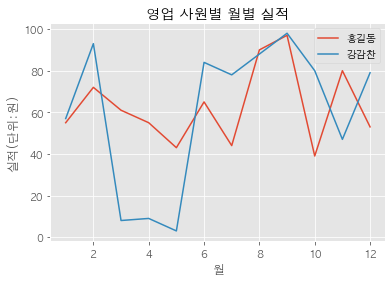

In [4]:
# 라인그래프 설정
plt.style.use('ggplot')

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(data, hong, label='홍길동')
ax.plot(data, kang, label='강감찬')

# 축 제목과 범례 그리기
# ax.set_title('영업 사원별 월별 실적',fontproperties = font)
# ax.set_ylabel('실적(단위:원)', fontproperties = font)
# ax.set_xlabel('월', fontproperties = font)

plt.title('영업 사원별 월별 실적')
plt.ylabel('실적(단위:원)')
plt.xlabel('월')

ax.legend()
plt.show()

## Bar 차트 중복으로 그리기

In [5]:
# 데이터 가져오기
df = pd.read_csv('data/1군전염병발병현황_년도별_2.csv', encoding='euc-kr',
                index_col='년도')
df.head()

,콜레라,장티푸스,이질,대장균
년도,,,,
2002년,4,221,767,8
2003년,1,199,1117,52
2004년,10,174,487,118
2005년,16,219,317,43
2006년,5,200,389,37


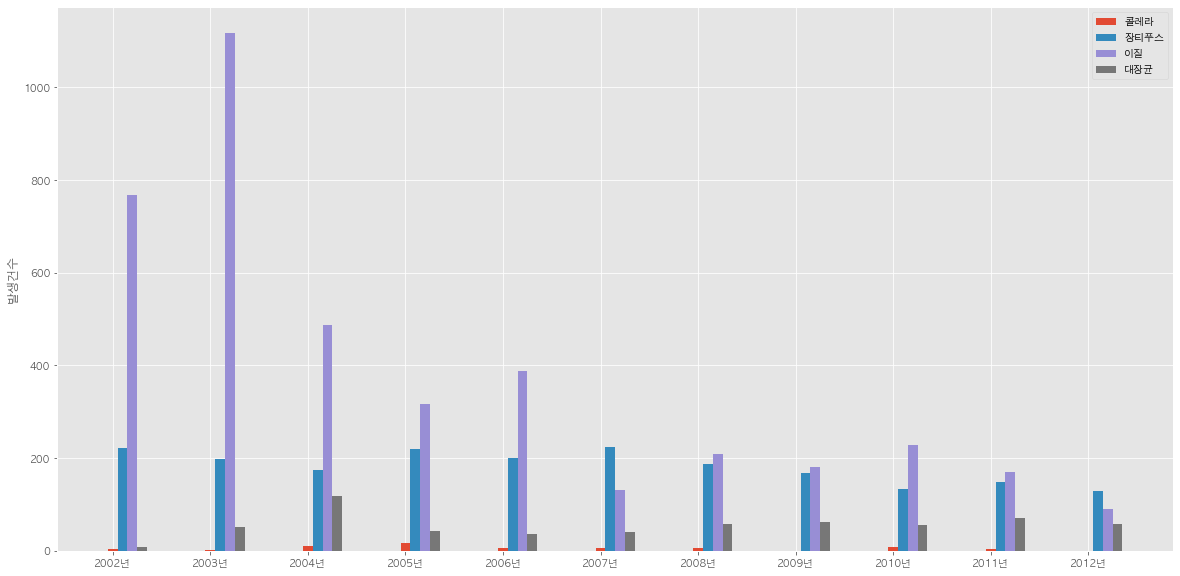

In [6]:
# 그래프 생성
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)

# 연도 개수만큼 분할
wt = np.array(range(len(df)))
w = 0.1

for i in df.columns:
    ax.bar(wt, df[i], width=w, label=i)
    wt = wt + w
    
ax.set_xticks(np.array(range(len(df))))
ax.set_xticklabels(df.index)
ax.set_ylabel('발생건수')
ax.legend()

plt.show()

## Line & Bar 차트 사용
- 참고 : 범례 위치 지정하기
    - Location String = Location Code
    - 'best' = 0
    - 'upper right' = 1
    - 'upper left' = 2
    - 'lower left' = 3
    - 'lower right' = 4
    - 'right' = 5
    - 'center left' = 6
    - 'center right' = 7
    - 'lower center' = 8
    - 'upper center' = 9
    - 'center' = 10

In [8]:
# 주식 데이터 가져오기
s_df = pd.read_csv('data/주가변동.csv', encoding='euc-kr', index_col=0)
s_df.head()

,시작가,장중고가,장중저가,종가,거래금액
날짜,,,,,
2010-01-04,1600.0,1600.0,1580.0,1597.0,5600.0
2010-01-05,1597.0,1605.0,1590.0,1600.0,14800.0
2010-01-06,1600.0,1602.0,1579.0,1601.0,8300.0
2010-01-07,1600.0,1600.0,1590.0,1595.0,3700.0
2010-01-08,1599.0,1601.0,1595.0,1600.0,32300.0


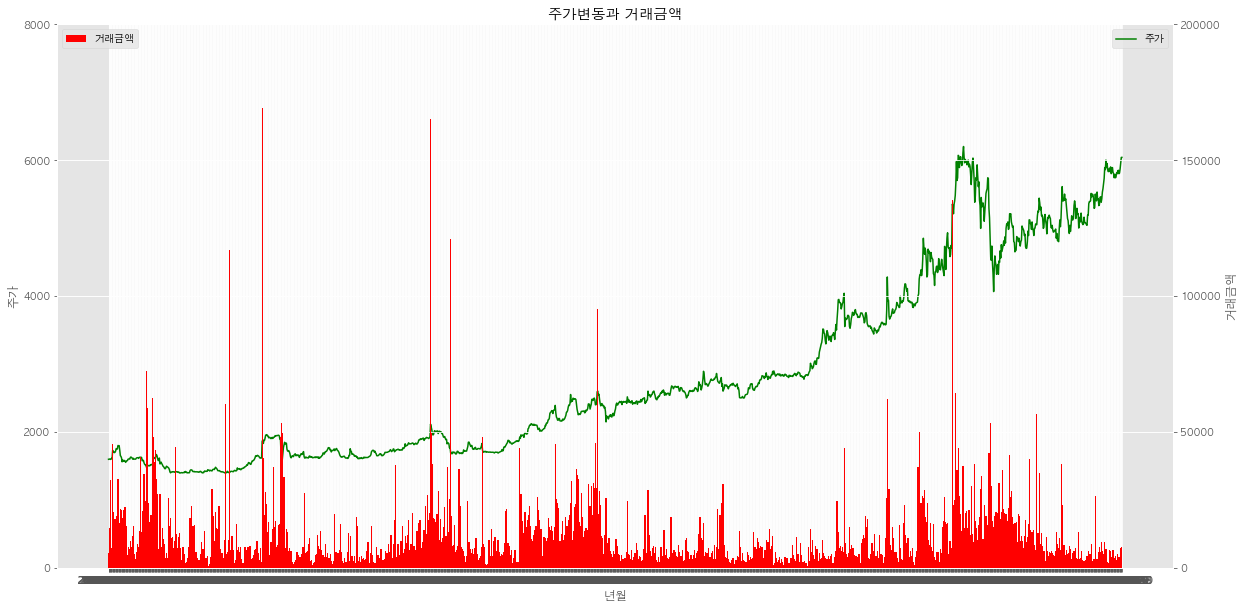

In [14]:
# 그래프 그리기
plt.style.use('ggplot')

fig = plt.figure(figsize=(20,10))
s_ax_1 = fig.add_subplot(111)

s_ax_1.plot(s_df.index, s_df['종가'],color='g', label='주가')

# 1개의 x축에 2개의 y축 설정하기
s_ax_2 = s_ax_1.twinx() 
s_ax_2.bar(s_df.index, s_df['거래금액'], color='r', label='거래금액', width=2)

# 축과 레이블 값 지정하기
s_ax_1.set_yticks([i * 2000 for i in range(5)])
s_ax_1.set_ylabel('주가')
s_ax_1.set_xlabel('년월')

s_ax_2.set_yticks( [ i* 50000 for i in range(5)])
s_ax_2.set_ylabel('거래금액')

s_ax_1.set_title('주가변동과 거래금액')

# 범례설정
s_ax_1.legend(loc=1)
s_ax_2.legend(loc=2)

plt.show()

## 산포도 그래프 그리기
- 주요 영화 평점을 산포도 그래프로 작성하여 평점 패턴 찾기
- 흐름이나 유형을 한눈에 파악하기 용이

In [26]:
# 영화 평점 데이터 가져오기
ani_df = pd.read_csv('data/ani_info.csv', encoding='euc-kr',index_col=0)
ani_df.head()

# vote_no가 8만번 이상인 작품만 골라내기
ani_df.loc[ani_df['vote_no']>=80000, ['name','vote_no']]

# vote_no가 60만개 이상이면서 평점이 8이상인 작품 골라내기
ani_df.loc[(ani_df['vote_no']>=600000) & (ani_df['rating']>=8),['name','rating']]

# 장르별 추출하기
types = ani_df['type'].unique() # 중복제거

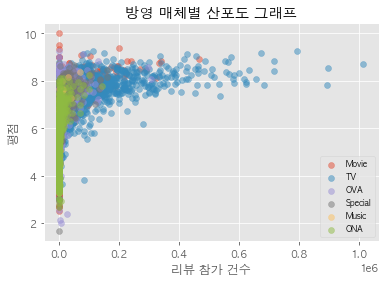

In [30]:
# 그래프 그리기
fig = plt.figure()
ax = fig.add_subplot(111)

for t in types:
    x = ani_df.loc[ani_df['type']==t, 'vote_no']
    y = ani_df.loc[ani_df['type']==t, 'rating']
    
    # alpha : 투명도
    ax.scatter(x,y,alpha=0.5, label=t)

# 축 이름, 범례 설정
ax.set_title('방영 매체별 산포도 그래프')
ax.set_xlabel('리뷰 참가 건수')
ax.set_ylabel('평점')

ax.legend(loc='lower right', fontsize=8)
    
plt.show()

## Pie 차트 간 비교

In [36]:
# 데이터 가져오기
c_df = pd.read_csv('data/1군전염병발병현황_년도별_2.csv', encoding='euc-kr', index_col=0)
c_df.head()

# 2004년 데이터와 2005년 데이터 비교
c_df_2004 = c_df.loc['2004년']
c_df_2005 = c_df.loc['2005년']

In [38]:
c_df_2004

콜레라      10
장티푸스    174
이질      487
대장균     118
Name: 2004년, dtype: int64

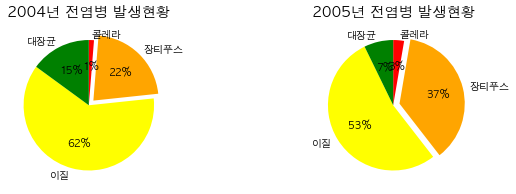

In [43]:
# 그래프 그리기
plt.style.use('ggplot')

fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# 색깔 설정하기
color = ('red','orange','yellow','green')

ax1.pie(c_df_2004,
        explode = (0,0.1,0,0),
        labels = c_df_2004.index,
        autopct = '%1.0f%%',
        colors = color,
        startangle = 90, 
        counterclock = False
       )

ax2.pie(c_df_2005,
        explode = (0,0.1,0,0),
        labels = c_df_2005.index,
        autopct = '%1.0f%%',
        colors = color,
        startangle = 90, 
        counterclock = False
       )

ax1.set_title('2004년 전염병 발생현황')
ax2.set_title('2005년 전염병 발생현황')

# 두 그래프 사이의 간격 조정
fig.subplots_adjust(wspace=0.2)
plt.show()